In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [4]:
from google.colab import files
files.upload()

{}

In [0]:
train = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')

In [5]:
train.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


In [6]:
test.head(10)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
5,3514,c,3252.0,1.0,115109,2307.0
6,331420,x,859.0,1.0,88355,6507.0
7,406540,c,770.0,4.0,74489,57775.0
8,227379,s,8727.0,2.0,37904,4459.0
9,331687,p,170.0,4.0,162810,4899.0


In [7]:
train.isnull().any(), train.dtypes

(ID            False
 Tag           False
 Reputation    False
 Answers       False
 Username      False
 Views         False
 Upvotes       False
 dtype: bool, ID              int64
 Tag            object
 Reputation    float64
 Answers       float64
 Username        int64
 Views         float64
 Upvotes       float64
 dtype: object)

In [8]:
test.isnull().any(),test.dtypes

(ID            False
 Tag           False
 Reputation    False
 Answers       False
 Username      False
 Views         False
 dtype: bool, ID              int64
 Tag            object
 Reputation    float64
 Answers       float64
 Username        int64
 Views         float64
 dtype: object)

In [9]:
train['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [10]:
train["Tag"] = train["Tag"].astype('category')
train.dtypes

ID               int64
Tag           category
Reputation     float64
Answers        float64
Username         int64
Views          float64
Upvotes        float64
dtype: object

In [11]:
train["Tag"] = train["Tag"].cat.codes
train.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942.0,2.0,155623,7855.0,42.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0
3,96996,0,264.0,3.0,168793,27064.0,9.0
4,131465,1,4271.0,4.0,112223,13986.0,83.0
5,345568,7,440.0,1.0,23866,5577.0,4.0
6,376865,1,147.0,1.0,10759,17184.0,17.0
7,467378,4,2269.0,2.0,54623,312.0,3.0
8,393640,4,111.0,2.0,172926,53738.0,79.0
9,130054,1,2749.0,1.0,10189,227.0,0.0


In [0]:
test["Tag"] = test["Tag"].astype('category')

In [0]:
test["Tag"] = test["Tag"].cat.codes

In [15]:
test.head(10)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,0,5645.0,3.0,50652,33200.0
1,71864,1,24511.0,6.0,37685,2730.0
2,141692,3,927.0,1.0,135293,21167.0
3,316833,3,21.0,6.0,166998,18528.0
4,440445,3,4475.0,10.0,53504,57240.0
5,3514,1,3252.0,1.0,115109,2307.0
6,331420,9,859.0,1.0,88355,6507.0
7,406540,1,770.0,4.0,74489,57775.0
8,227379,8,8727.0,2.0,37904,4459.0
9,331687,6,170.0,4.0,162810,4899.0


In [16]:
train.describe()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045.00000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,3.54305,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.49392,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.00000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,1.00000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,4.00000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,6.00000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,9.00000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


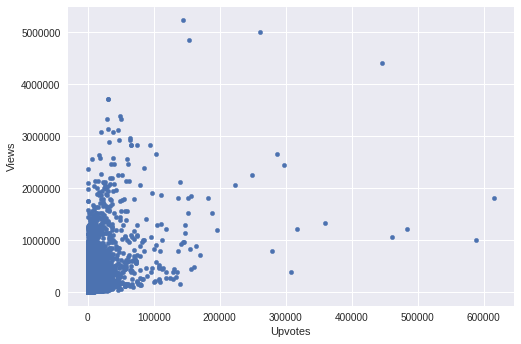

In [17]:
train.plot('Upvotes','Views', kind='Scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


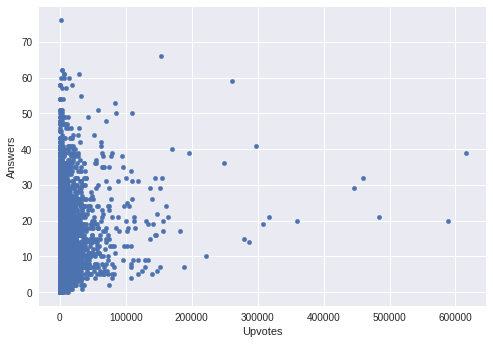

In [18]:
train.plot('Upvotes','Answers', kind='Scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


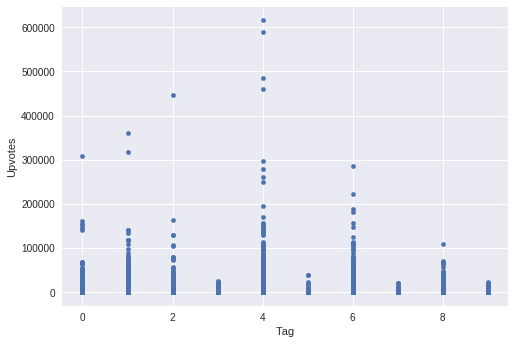

In [19]:
train.plot('Tag','Upvotes', kind='Scatter')

In [20]:
train_data = train.drop('Upvotes', axis=1)
target = train['Upvotes']

train_data.shape, target.shape

((330045, 6), (330045,))

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

X_train = train.drop("Upvotes", axis=1)
X_train = X_train.drop("ID", axis=1)
Y_train = train["Upvotes"].values
X_test = test.drop("ID", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
X_train.shape, Y_train.shape, X_test.shape

((330045, 5), (330045,), (141448, 5))

In [24]:
X_train

,0,1,2,3,4
0,0.000000,0.003782,0.026316,0.885540,0.001500
1,0.000000,0.024986,0.157895,0.123940,0.010666
2,0.111111,0.001303,0.052632,0.319663,0.001540
3,0.000000,0.000253,0.039474,0.960481,0.005172
4,0.111111,0.004097,0.052632,0.638581,0.002672
5,0.777778,0.000422,0.013158,0.135804,0.001064
6,0.111111,0.000141,0.013158,0.061222,0.003283
7,0.444444,0.002177,0.026316,0.310821,0.000058
8,0.444444,0.000106,0.026316,0.983999,0.010271
9,0.111111,0.002637,0.013158,0.057978,0.000042


In [25]:
X_test

,0,1,2,3,4
0,0.000000,0.005415,0.041096,0.288210,0.006632
1,0.111111,0.023513,0.082192,0.214422,0.000544
2,0.333333,0.000889,0.013699,0.769855,0.004228
3,0.333333,0.000020,0.082192,0.950271,0.003700
4,0.333333,0.004293,0.136986,0.304439,0.011436
5,0.111111,0.003120,0.013699,0.654999,0.000459
6,1.000000,0.000824,0.013699,0.502757,0.001298
7,0.111111,0.000739,0.054795,0.423853,0.011542
8,0.888889,0.008372,0.027397,0.215668,0.000889
9,0.666667,0.000163,0.054795,0.926440,0.000977


In [26]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

25.53

In [27]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

32.1

In [1]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

NameError: ignored

In [2]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

NameError: ignored

In [0]:
Y_pred = Y_pred.tolist()
for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        Y_pred[i] = 'Y'
    else:
        Y_pred[i] = 'N'
y_pred = np.array(Y_pred)

In [0]:
submission = pd.DataFrame({
        "ID": test["ID"],
        "Upvotes": Y_pred
    })
submission.to_csv('./submission.csv', index=False)
#print(submission)